In [95]:
pip install pandas scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

# cc_data = pd.read_csv('processed_credit_dataset.csv')

# selected_columns = ['Gender','Own_car','Own_property','Unemployed','Num_children','Num_family','Account_length','Total_income','Age','Years_employed','Target','Income_type_Commercial associate','Income_type_Pensioner','Income_type_State servant','Income_type_Student','Income_type_Working','Education_type_Academic degree','Education_type_Higher education','Education_type_Incomplete higher','Education_type_Lower secondary','Education_type_Secondary / secondary special','Family_status_Civil marriage','Family_status_Married','Family_status_Separated','Family_status_Single / not married','Family_status_Widow','Housing_type_Co-op apartment','Housing_type_House / apartment','Housing_type_Municipal apartment','Housing_type_Office apartment','Housing_type_Rented apartment','Housing_type_With parents','Occupation_type_Accountants','Occupation_type_Cleaning staff','Occupation_type_Cooking staff','Occupation_type_Core staff','Occupation_type_Drivers','Occupation_type_HR staff','Occupation_type_High skill tech staff','Occupation_type_IT staff','Occupation_type_Laborers','Occupation_type_Low-skill Laborers','Occupation_type_Managers','Occupation_type_Medicine staff','Occupation_type_Other','Occupation_type_Private service staff','Occupation_type_Realty agents','Occupation_type_Sales staff','Occupation_type_Secretaries','Occupation_type_Security staff','Occupation_type_Waiters/barmen staff']
# data_subset = cc_data[selected_columns]

# dbscan = DBSCAN(eps=1.8, min_samples=137, n_jobs=-1)
# clusters = dbscan.fit_predict(data_subset)
# data_subset['Cluster'] = clusters

# Import clustered data from Java program
data_subset = pd.read_csv('../dbscan_cc_clustered.csv')

# Remove noise cluster
data_subset = data_subset[data_subset['Cluster'] != -1]
with_clusters = data_subset
data_subset = data_subset.drop(columns=['Cluster'])

# Calculate the percentage of each target value within each cluster
cluster_target_distribution = with_clusters.groupby(['Cluster', 'Target']).size().unstack().fillna(0)
cluster_target_percentage = cluster_target_distribution.div(cluster_target_distribution.sum(axis=1), axis=0) * 100

# Format the output
cluster_target_distribution.columns = ['Count (Target=0)', 'Count (Target=1)']
cluster_target_percentage.columns = ['Percentage (Target=0)', 'Percentage (Target=1)']
cluster_target_percentage = cluster_target_percentage.applymap(lambda x: f"{x:.2f}%")

print("Cluster target distribution (count):")
print(cluster_target_distribution)
print("\nCluster target distribution (percentage):")
print(cluster_target_percentage)

# Calculate purity
total_samples = with_clusters.shape[0]
max_cluster_counts = cluster_target_distribution.max(axis=1)
purity = max_cluster_counts.sum() / total_samples

print(f"Purity: {purity:.4f}")

# Calculate entropy
def cluster_entropy(cluster):
    cluster_sum = cluster.sum()
    if cluster_sum == 0:
        return 0
    probabilities = cluster / cluster_sum
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Adding a small value to avoid log(0)
    return entropy

entropy_values = cluster_target_distribution.apply(cluster_entropy, axis=1)
weighted_entropy = (entropy_values * cluster_target_distribution.sum(axis=1) / total_samples).sum()

print(f"Entropy: {weighted_entropy:.4f}")


Cluster target distribution (count):
         Count (Target=0)  Count (Target=1)
Cluster                                    
0                    1434               178
1                     686                98

Cluster target distribution (percentage):
        Percentage (Target=0) Percentage (Target=1)
Cluster                                            
0                      88.96%                11.04%
1                      87.50%                12.50%
Purity: 0.8848
Entropy: 0.5151


/tmp/ipykernel_13964/476014821.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_target_percentage = cluster_target_percentage.applymap(lambda x: f"{x:.2f}%")


      Gender  Own_car  Own_property  Unemployed  Num_children  Num_family  \
0        1.0      1.0           1.0         0.0     -0.551258   -0.195755   
1        0.0      0.0           1.0         0.0     -0.551258   -0.195755   
2        0.0      0.0           1.0         1.0     -0.551258   -1.267716   
3        1.0      0.0           1.0         0.0     -0.551258   -0.195755   
4        0.0      1.0           1.0         0.0     -0.551258   -0.195755   
...      ...      ...           ...         ...           ...         ...   
2391     1.0      0.0           0.0         1.0     -0.551258   -0.195755   
2392     1.0      0.0           1.0         0.0     -0.551258   -0.195755   
2393     0.0      0.0           1.0         1.0     -0.551258   -0.195755   
2394     0.0      0.0           1.0         0.0     -0.551258   -0.195755   
2395     1.0      1.0           1.0         0.0     -0.551258   -0.195755   

      Account_length  Total_income       Age  Years_employed  ...  \
0     

[[-1.39268228 -0.52737308]
 [-2.60181718  0.40333553]
 [ 0.82668975  0.66260304]
 ...
 [ 0.65015161 -0.6406467 ]
 [-1.13137578 -0.37473275]
 [-0.99640652 -0.26657281]]


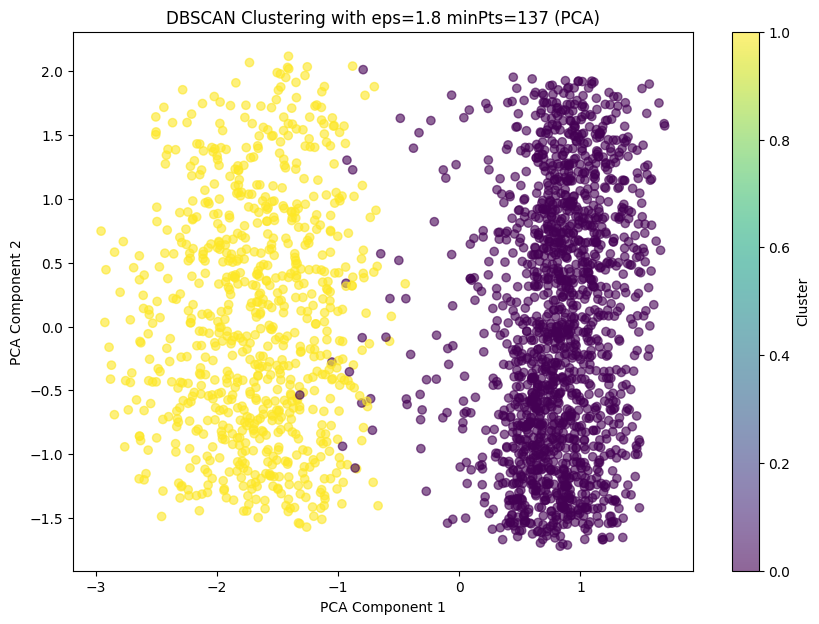

In [97]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(data_subset)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_subset)
print(data_2d)

plt.figure(figsize=(10, 7))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=with_clusters['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('DBSCAN Clustering with eps=1.8 minPts=137 (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
